In [11]:
import collections
import math
import os
import random

from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [12]:
sklearn.__version__

'0.17.1'

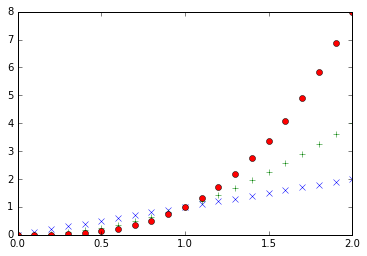

In [2]:
def generate_data(step):
    df = pd.DataFrame(columns=('x', 'x2', 'x3'))
    for i, x in enumerate(np.arange(0, 2.0 + 0.5 * step, step)):
        df.loc[i] = [x, x * x, x * x * x]
    return df

df = generate_data(0.1)
plt.plot(df['x'], df['x'], 'x')
plt.plot(df['x'], df['x2'], '+')
plt.plot(df['x'], df['x3'], 'o')
plt.show()

# Linear Regression
- [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [pandas.DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)

/Users/yunabe/local/homebrew/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


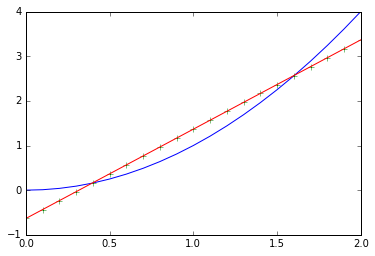

In [3]:
lr = LinearRegression()
lr.fit(df[['x']], df['x2'])

plt.plot(df['x'], df['x2'])
plt.plot(df['x'], lr.predict(df[['x']]), '+')

# Learned parameters are stored in coef_ and intercept_.
assert len(lr.coef_) == 1
def line(x):
    return lr.coef_[0] * x + lr.intercept_
plt.plot([df['x'].min(), df['x'].max()],
         [line(df['x'].min()), line(df['x'].max())])

plt.show()

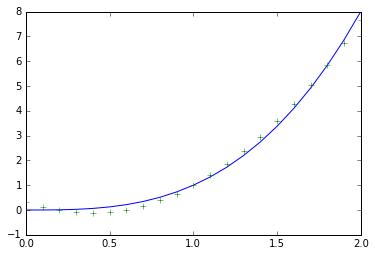

[('x', -2.3419999999999996), ('x2', 3.0)]

In [4]:
lr = LinearRegression()
lr.fit(df[['x', 'x2']], df['x3'])

plt.plot(df['x'], df['x3'])
plt.plot(df['x'], lr.predict(df[['x', 'x2']]), '+')
plt.show()

zip(df[['x', 'x2']].columns, lr.coef_)

# Classification
- [sklearn.linear_model.LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Receiver Operating Characteristic (ROC)](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
- [Precision-Recall](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

def probability(x, y):
    z = 3 * x - 5 * y + 2
    return 1.0 / (1 + math.exp(-1.0 * z))

df = pd.DataFrame(np.random.normal(scale=0.5, size=[1000, 2]), columns=('x', 'y'))
df['label'] = df.apply(lambda r: random.random() < probability(r['x'], r['y']), axis=1)

In [6]:
classifier = LogisticRegression()
classifier.fit(df[['x', 'y']], df['label'])

print classifier.coef_, classifier.intercept_

[[ 2.06054001 -4.02172975]] [ 1.74049897]


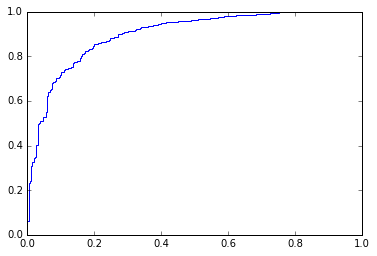

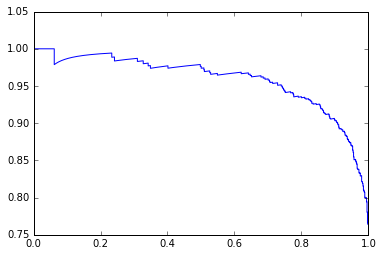

In [7]:
# ROC curve
fpr, tpr, _ = roc_curve(df['label'], classifier.decision_function(df[['x', 'y']]))
plt.plot(fpr, tpr)
plt.show()

# Recall-coverage curve
precision, recall, _ = precision_recall_curve(df['label'], classifier.decision_function(df[['x', 'y']]))
plt.plot(recall, precision)
plt.show()

# Random Forests
- [sklearn.ensemble.RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
- [sklearn.ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

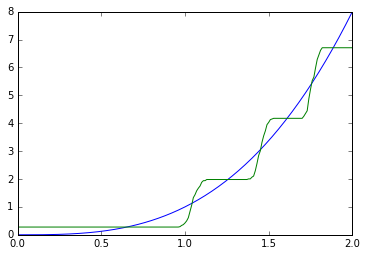

In [8]:
df = generate_data(0.01)

rfr = RandomForestRegressor(n_estimators=100, max_depth=2)
rfr.fit(df[['x']], df['x3'])

plt.plot(df['x'], df['x3'])
plt.plot(df['x'], rfr.predict(df[['x']]))
plt.show()